<span style="font-size:30px">**Medidas de Grupos de los nodos. Parte 1: Coeficiente de Acumulación (*clustering coefficient*).**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### En esta serie de notebooks vamos a trabajar con algunos conceptos sobre grupos de nodos, los cuales porporcionan una descripción de las redes en términos de estructuras locales.

### Hay varios conceptos para describir a una red en términos de grupos (también llamados comunidades o clases), en donde los conceptos primarios son los de *cliques*, *k-núcleos* o *k-componentes*. En estos notebooks sobre medidas de grupos de los nodos vamos a trabajar en dos conceptos fundamentales, el coeficiente de acumulación y la modularidad.

### En esta primera parte nos corresponde abordar el coeficiente de acumulación.

# Antecedentes: La necesidad de describir a las redes en términos de comunidades de nodos.

### Muchos fenómenos o sistemas sociales, biológicos o físicos pueden ser descritos mediante redes, pues poseen elementos (que corresponderían a los nodos bajo esta descripción) que lo conforman y las interacciones (enlaces) entre ellos. Estos elementos pueden dividirse naturalmente en grupos, o comunidades, o clases, dependiendo de sus características, los cuales nos proporcionarán información de cómo se comporta la red localmente.

# Introducción:

### El coeficiente de acumulación es una medida sobre la cantidad de enlaces entre nodos adyacentes a un determinado nodo en una red.

### Consideremos un nodo $i$ con grado $k_i$, es decir, $i$ tiene $k_i$ nodos adyacentes (de $i$ salen o llegan $k_i$ enlaces), entonces el coeficiente de acumulación del nodo $i$, $c_i$, va a ser la proporción del número de enlaces entre los vecinos de $i$, $L_i$, con el máximo número de enlaces posibles entre ellos, $\frac{k_i (k_i -1)}{2}$:

<font size="5"> $c_i = \frac{2L_i}{k_i (k_i -1)}$ </font>

# Ejercicio:

### Vamos a tomar como punto de partida el notebook de medidas de centralidad parte 6, pues trabajaremos con una estructura un tanto similar.

### Análogamente a las centralidades analizadas, en donde usamos las funciones *nx.eigenvector_centrality*, *nx.degree_centrality*, *nx.closeness_centrality* y *nx.betweenness_centrality*, para implementar una descripción de la red en comunidades en términos del clustering, usaremos la función *nx.clustering*, la cual también nos arroja un diccionario que asigna a cada nodo un valor del coeficiente de acumulación.

### Trabajaremos sobre la misma red usada en los notebooks de centralidades, *ca-netscience.mtx*.


,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


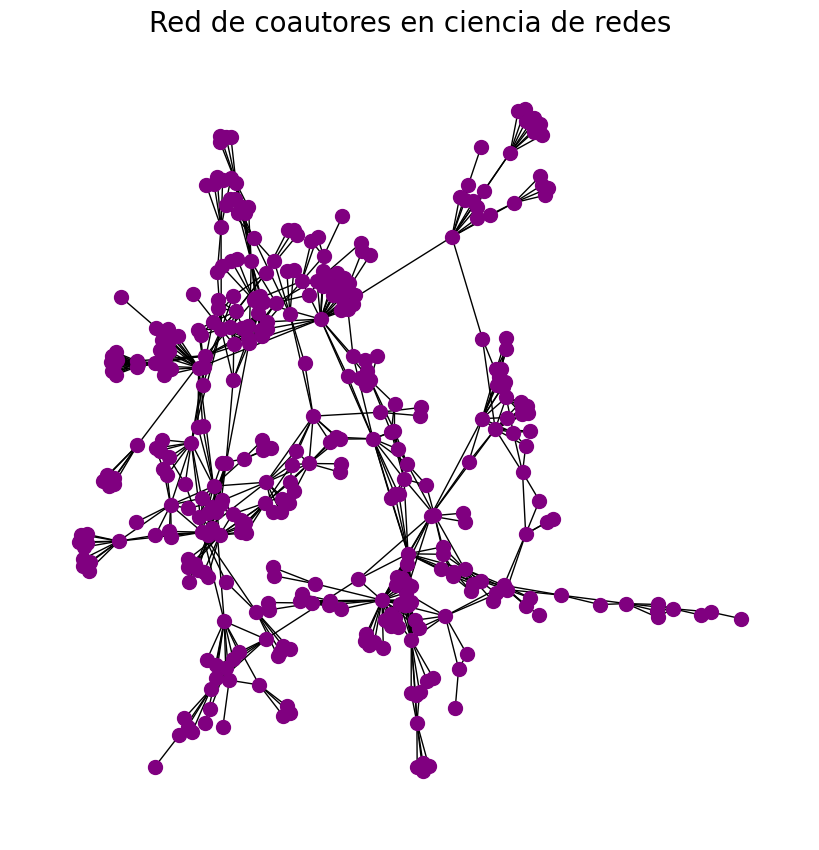

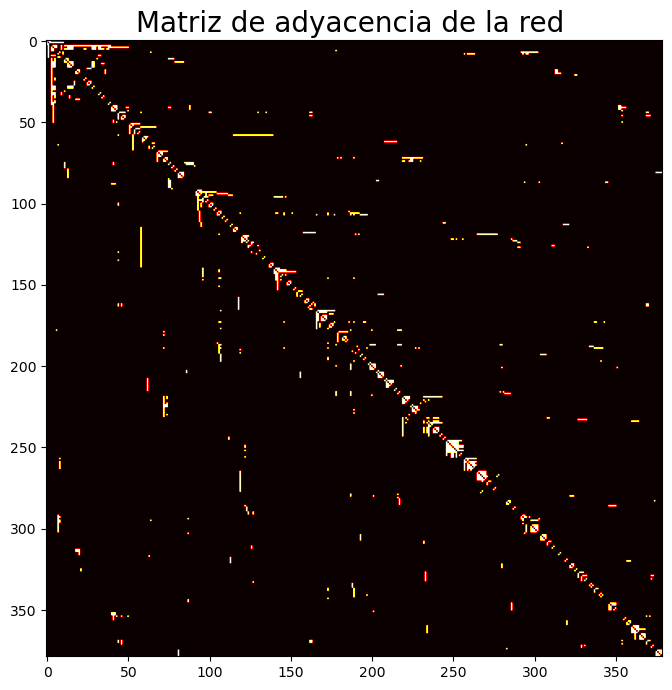

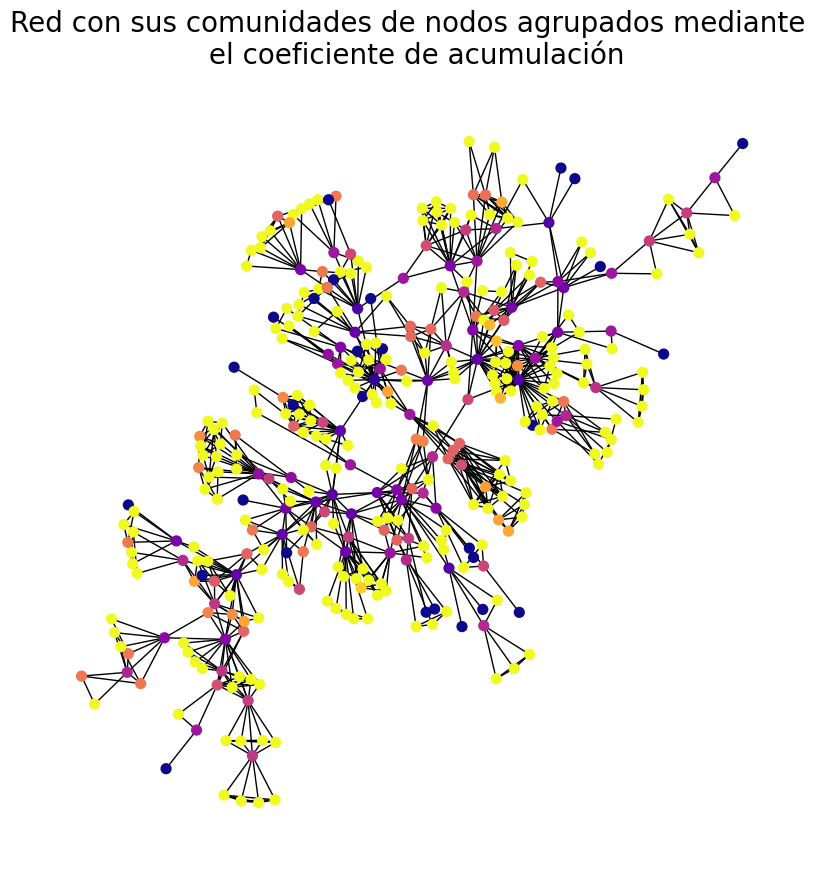



El coeficiente de acumulación de cada nodo (mostrados en formato de diccionario) es:


{2: 1.0,
 1: 0.26666666666666666,
 3: 1.0,
 4: 0.13368983957219252,
 5: 0.18233618233618235,
 16: 0.2761904761904762,
 44: 0.5,
 113: 0.2571428571428571,
 131: 0.3333333333333333,
 250: 0.8666666666666667,
 259: 1.0,
 13: 0.25,
 14: 1.0,
 15: 0.3333333333333333,
 45: 0.7333333333333333,
 46: 1.0,
 47: 1.0,
 61: 1.0,
 126: 0.6666666666666666,
 127: 0.6666666666666666,
 128: 0.39285714285714285,
 146: 0.3333333333333333,
 152: 0,
 153: 1.0,
 154: 1.0,
 164: 1.0,
 165: 1.0,
 166: 1.0,
 176: 1.0,
 177: 1.0,
 249: 1.0,
 274: 1.0,
 313: 1.0,
 314: 1.0,
 323: 1.0,
 324: 1.0,
 330: 1.0,
 371: 1.0,
 373: 0.8333333333333334,
 374: 1.0,
 199: 0.5714285714285714,
 201: 0.23076923076923078,
 202: 0.5714285714285714,
 204: 0.6666666666666666,
 231: 0.21978021978021978,
 235: 1.0,
 236: 0.4222222222222222,
 237: 1.0,
 238: 1.0,
 254: 1.0,
 298: 0.8333333333333334,
 7: 0.3333333333333333,
 6: 1.0,
 8: 0.12121212121212122,
 190: 0.6666666666666666,
 191: 1.0,
 192: 1.0,
 193: 1.0,
 26: 0.06267806267806

In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'purple') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Matriz de adyacencia (únicamente para ver la estructura de la red):
plt.figure( figsize = [8,8] )
A=nx.to_numpy_array(G)
plt.imshow(A,"hot") #Para ver las intensidades de la imagen que representan a los enlaces podemos usar el formato de mapa de calor
plt.title("Matriz de adyacencia de la red ",fontsize=20)
plt.show()
print("\n")

#Describiendo la red en comunidades en términos del coeficiente de acumulación:
clustering=nx.clustering(G) #El diccionario
coeficiente_acumulación=np.array([clustering[i] for i in G])
plt.figure(figsize = [8,8])
nx.draw_kamada_kawai(G,node_color=coeficiente_acumulación,node_size=50,cmap='plasma') #El diseño Kamada Kawai permite una adecuada visualización de las comunidades.
plt.title("Red con sus comunidades de nodos agrupados mediante \n el coeficiente de acumulación",fontsize=20)
plt.show()
print("\n")
print("El coeficiente de acumulación de cada nodo (mostrados en formato de diccionario) es:")
display(clustering)



# Fin del ejercicio.